# Lasso Regression and Ridge Regression

### Learning Objectives

By the end of this lesson students will:

- Understand regularization at a high level.
- Be able to use Ridge regression to apply regularization
- Be able to use Lasso regression to apply regularization

- Regularization is a method for "constraining" or "regularizing" the size of the coefficients, thus "shrinking" them toward zero.
- It reduces model variance and thus minimizes overfitting. 
- Often improves model generalization.

Our goal is to locate the optimum model complexity, and thus regularization is useful when we believe our model is too complex.

<a id="how-does-regularization-work"></a>
### How Does Regularization Work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which minimizes the residual sum of squares (RSS).

For a regularized linear regression model, we minimize the sum of RSS and a "penalty term" that penalizes coefficient size.

## Ridge regression  minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

This is __L2__ regularization, aka _Euclidian_ distance, uses Pythagorean Theorem. Think _squared_.

## Lasso regression minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

This is __L1__ regularization, aka _Manhattan_, _Taxicab_, and [many other names](https://en.wikipedia.org/wiki/Taxicab_geometry). Think _absolute value_.

- $p$ is the number of features.
- $\beta_j$ is a model coefficient.
- $\alpha$ is a tuning parameter:
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.
    

## A larger alpha results in more regularization ☝️

- Lasso regression shrinks coefficients all the way to zero, thus removing them from the model.
- Ridge regression shrinks coefficients toward zero, but they rarely reach zero.

#### Parameters:

- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (same as using StandardScaler)
    Sometimes this helps and sometimes it hurts

# Boston housing 

In [1]:
# usual imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# read in the data
df_boston = pd.read_csv('../data/boston_data.csv')

In [3]:
# inspect 
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
 ZN        506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


### Break into X and y

In [5]:
X = df_boston.drop('MEDV', axis=1)
y = df_boston['MEDV']

In [6]:
feature_cols = X.columns

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [8]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### Split into training and test sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Instantiate the models

In [12]:
lr = LinearRegression()
ridge = Ridge()        # default alpha is 1
lasso = Lasso()        # default alpha is 1

### Fit and score the models

Let's fit and score the models. We aren't creating a validation dataset and using cross validation here because we want to focus on what Ridge and Lasso do.

### Vanilla Linear Regression 🍦


In [13]:
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6353089008165279

### Ridge (L2)

In [14]:
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.6246578174573033

### Lasso (L1)

In [15]:
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

0.6281138608896981

### Let's exammine the cofficients 

Make a DataFrame, plot, and look at the absolute value of the magnitudes of each one.

### Vanilla Linear Regression

In [25]:
feature_cols = X.columns

df_lr = pd.DataFrame( [lr.coef_], columns=feature_cols)
df_lr

df_lr.plot(kind='barh', title='Linear Regression Coefficients');

df_lr_vals = df_lr.T.abs().sort_values(by=0, ascending=False)
df_lr_vals.columns=['LR']
df_lr_vals

#### Ridge

In [26]:
df_ridge = pd.DataFrame( [ridge.coef_], columns=feature_cols)
df_ridge

df_ridge.plot(kind='barh', title='Ridge Coefficients');

df_ridge_vals = df_ridge.T.abs().sort_values(by=0, ascending=False)
df_ridge_vals.columns=['Ridge']
df_ridge_vals

#### Lasso

In [31]:
df_lasso = pd.DataFrame( [lasso.coef_], columns=feature_cols)
df_lasso

df_lasso.plot(kind='barh');

df_lasso_vals = df_lasso.T.abs().sort_values(by=0, ascending=False)
df_lasso_vals.columns=['Lasso']
df_lasso_vals

In [32]:
df_coefficients = pd.concat([df_lr_vals, df_ridge_vals, df_lasso_vals], axis=1)
df_coefficients

,LR,Ridge,Lasso
NOX,14.855945,7.436384,0.000000
RM,4.706390,4.750906,1.850864
DIS,1.339101,1.226738,0.645608
PTRATIO,0.941651,0.868120,0.736596
LSTAT,0.513789,0.524057,0.721438
CHAS,0.400325,0.275574,0.000000
RAD,0.254184,0.230427,0.177093
CRIM,0.102336,0.098727,0.053649
INDUS,0.070874,0.042701,0.000000
ZN,0.040151,0.040513,0.036670


In [33]:
df_coefficients.sum()

LR       23.242815
Ridge    15.518878
Lasso     4.251885
dtype: float64

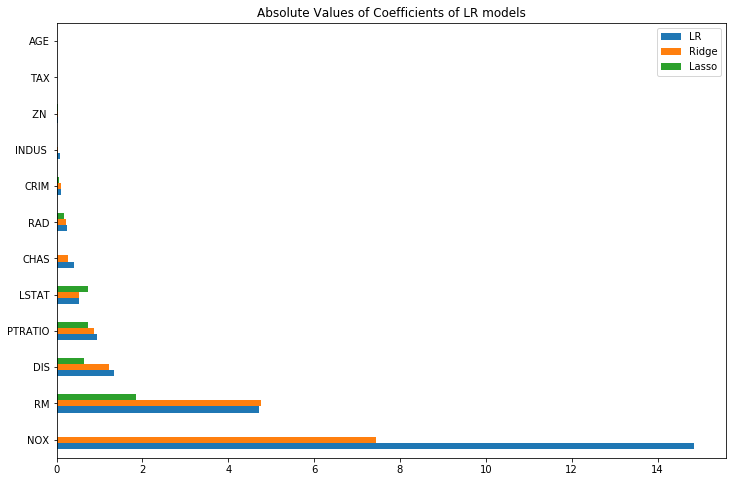

In [34]:
df_coefficients.plot(kind='barh', title='Absolute Values of Coefficients of LR models', figsize=(12, 8));

# Summary

You've seen how to use regularization with Linear Regression model variants to decrease variance and attempt to improve generalizability in your models. Most machine learning models have regularization hyperparameters. You definitely want to try them out!

<a id="advice-for-applying-regularization"></a>
### Advice for Applying Regularization


**How should you choose between lasso regression and ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicollinearity in your model. Can be harder to interpret feature importances.
- ElasticNet regression is a combination of lasso regression and Ridge Regression. Requires more tuning and less interpretable, but might work better

Most models have parameters for regularization. In Logistic Regression its `C`, higher values mean less regularization, and it's applied by default. Fun! 😉

### Check for understanding

1. How does regularization relate to the bias-variance tradeoff?
2. How does Ridge Regression differ from Lasso Regression?


### More resources

#### The docs:

- [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)
- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)  
- [ElasticNet](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) 


To go deeper with Bias/Variance and Regularization with Ridge Regression, [here's a good article](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db).